In [1]:
import pandas as pd

df_train = pd.read_csv('train_kwh.csv')
df_train_SOLA01 = df_train['SOLA01']

In [3]:
df_train_SOLA01 = df_train_SOLA01[df_train_SOLA01 > 0]
df_train_SOLA01 = df_train_SOLA01.reset_index(drop=True)

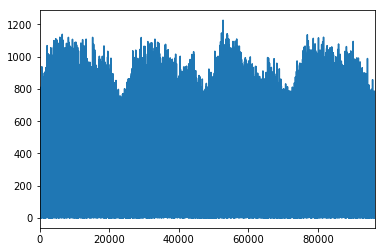

In [4]:
import matplotlib.pyplot as plt

df_train_SOLA01.plot()
plt.show()

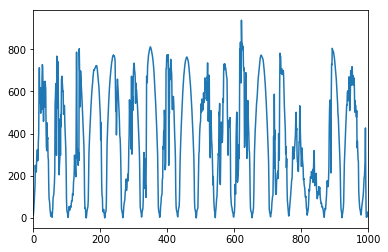

In [5]:
df_train_SOLA01_1000 = df_train_SOLA01[:1000]
df_train_SOLA01_1000.plot()
plt.show()

In [6]:
import numpy as np
from statsmodels.tsa import arima_model

df_train_SOLA01_numpy = df_train_SOLA01.as_matrix()
df_train_SOLA01_numpy = df_train_SOLA01_numpy.reshape(-1)
df_train_SOLA01_numpy = df_train_SOLA01_numpy.astype(np.float64)
#results=arima_model.ARIMA(df_train_SOLA01_numpy[:len(df_train_SOLA01.index) - 1000],order = [4,0,0]).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
import statsmodels.api as sm
res = sm.tsa.arma_order_select_ic(df_train_SOLA01_numpy, ic='aic', trend='nc')
#res = arma_order select_ic(df_train_SOLA01_numpy, ic= ['aic', 'bic'])
res

{'aic':               0             1             2
 0           NaN  1.359130e+06  1.282426e+06
 1  1.101701e+06  1.101671e+06  1.101615e+06
 2  1.101672e+06  1.100727e+06  1.100549e+06
 3  1.101616e+06  1.100589e+06           NaN
 4  1.101456e+06           NaN           NaN, 'aic_min_order': (2, 2)}

In [11]:
results=arima_model.ARIMA(df_train_SOLA01_numpy[:len(df_train_SOLA01.index) - 1000],order = [4,0,2]).fit()
plt.clf()
plt.plot(results.predict(start=len(df_train_SOLA01.index) - 2000,end=len(df_train_SOLA01.index)))
plt.show()

KeyboardInterrupt: 